In [1]:
import os
import argparse

import polars as pl
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd
from collections import defaultdict
import numpy as np
import json
import langid


In [2]:
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
os.chdir("/Users/yiyichen/PycharmProjects/MRL/")

In [4]:
from preprocessor.preprocessing import preprocessing_one_tweet

In [5]:
def split_data(df):
    train, test_val = train_test_split(df, test_size=0.2, random_state=1, shuffle=True)
    val, test = train_test_split(test_val, test_size=0.5,random_state=1, shuffle=True)
    return train, val, test

# Greek

In [6]:
data_path = os.path.join("datasets", "sentiment_analysis", "el")
save_dir = os.path.join(data_path, "preprocessed")

In [7]:
data_file = "datasets/sentiment_analysis/el/tsakalidis2018building/datasets/GRGE_sentiment.csv"

In [11]:
df = pd.read_csv(data_file, index_col=0)

In [13]:
df.loc[df["Polarity1"]=="Negative", "label"] =0
df.loc[df["Polarity1"]=="Neutral", "label"] =1
df.loc[df["Polarity1"]=="Positive", "label"] =2

In [15]:
df.label.value_counts()

1.0    979
0.0    582
2.0     79
Name: label, dtype: int64

In [19]:
data_dir ="datasets/hate_speech_detection/greek/preprocessed"
# get hate speeches as negative tweets.
df_ls = []
for file in os.listdir(data_dir):
    if file.endswith("csv"):
        filepath = os.path.join(data_dir, file)
        df_ = pd.read_csv(filepath, index_col=0)
        df_ls.append(df_)

In [20]:
df_ = pd.concat(df_ls)

In [22]:
df_neg = df_[df_["label"]==1]

In [24]:
len(df_neg)

2728

In [26]:
df = df[["Text", "label"]]

In [29]:
df.rename(columns={"Text":"text"}, inplace=True)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [30]:
df_neg["label"] = [0 for _ in range(len(df_neg))]

/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_75307/4235319041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neg["label"] = [0 for _ in range(len(df_neg))]


In [32]:
df_merge = pd.concat([df, df_neg])

In [34]:
df_merge.label.value_counts()

0.0    3310
1.0     979
2.0      79
Name: label, dtype: int64

In [35]:
df_pol = pd.read_csv(os.path.join(data_path, "polarized_tweet_frame.csv"))

In [38]:
df_pol.Polarity.value_counts()

 0    1238
-1     394
 1     255
Name: Polarity, dtype: int64

In [39]:
df_pol.Polarity_Intensity.value_counts()

 0    1238
-1     326
 1     194
-2      54
 2      51
-3      12
 3       9
-5       1
 4       1
-4       1
Name: Polarity_Intensity, dtype: int64

In [40]:
df_pol_pos = df_pol[df_pol.Polarity==1]

In [42]:
df_pol_pos.loc[df_pol_pos["Polarity"]==1, "label"]=2

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [44]:
df_pol_pos.rename(columns={"Tweet":"text"}, inplace=True)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [45]:
df_pol_pos = df_pol_pos[["text", "label"]]

In [46]:
df_merge = pd.concat([df_merge, df_pol_pos])

In [47]:
df_merge.label.value_counts()

0.0    3310
1.0     979
2.0     334
Name: label, dtype: int64

In [56]:
df_merge.text = df_merge.text.apply(preprocessing_one_tweet)


In [63]:
df_merge.drop_duplicates(subset=["text"], inplace=True)

In [67]:
df_merge.label.value_counts()

0.0    3298
1.0     928
2.0     329
Name: label, dtype: int64

In [71]:
df = df_merge.groupby("label").sample(329)

In [72]:
df = shuffle(df)

In [73]:
len(df)

987

In [75]:
train, val, test = split_data(df)

In [76]:
train.to_csv(os.path.join(save_dir, "train.csv"))
val.to_csv(os.path.join(save_dir, "val.csv"))
test.to_csv(os.path.join(save_dir, "test.csv"))


# Dutch

In [6]:
data_path = "datasets/sentiment_analysis/nl"

In [7]:
data_dict= defaultdict(list)
count=0
for file in os.listdir(os.path.join(data_path, "dutch_social")):
    if file.endswith(".json"):
        filepath = os.path.join(data_path, "dutch_social", file)
        with open(filepath, encoding="iso-8859-2") as f:
            data = json.load(f)
            
        for l in data:
            text = l["full_text"]
            sentiment = l["sentiment_pattern"]
            subjectivity = l["subjective_pattern"]
            data_dict[count] = [text, sentiment, subjectivity]
            count+=1
            

In [8]:
df = pd.DataFrame.from_dict(data_dict, orient="index")

In [9]:
df.columns = ["text", "sentiment", "subjective"]

In [10]:
df

,text,sentiment,subjective
0,Steeds meer mensen raadplegen Maps voor de bes...,0.675000,0.975
1,RT @PowNed: Ladies and gentlemen: we got him! ...,0.000000,0.000
2,"RT @RinkeNOS: Bijna met pensioen, en toen over...",0.000000,0.000
3,RT @lewinskylou2: In je elleboog hoesten. Een ...,0.400000,0.600
4,RT @lewinskylou2: In je elleboog hoesten. Een ...,0.400000,0.600
...,...,...,...
271337,Dutch government: 'What is meant by controllin...,0.000000,0.000
271338,RT @emmaspreekt: Is er al een filmpje waarop W...,0.366667,0.700
271339,RT @emmaspreekt: Is er al een filmpje waarop W...,0.366667,0.700
271340,RT @ohboywhatashot: President Hillary - #Faile...,0.000000,0.000


In [11]:
df.LEN = df.text.str.len()

/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_9957/2774872017.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.LEN = df.text.str.len()


In [12]:
min(df.LEN)

9.0

In [13]:
def process(x):
    try:
        return preprocessing_one_tweet(x)
    except Exception:
        np.nan

In [14]:
df.text= df.text.apply(process)

In [15]:
len(df)

271342

In [16]:
df.dropna(subset=["text"], inplace=True)

In [17]:
len(df)

271331

In [18]:
df["id"] = df.index

In [19]:
df.sentiment.value_counts()

 0.000000    116962
 0.100000      8571
 0.200000      6355
-0.100000      5209
 0.150000      4599
              ...  
-0.079861         1
 0.538750         1
 0.472917         1
-0.019048         1
 0.374167         1
Name: sentiment, Length: 3994, dtype: int64

<AxesSubplot:xlabel='id', ylabel='sentiment'>

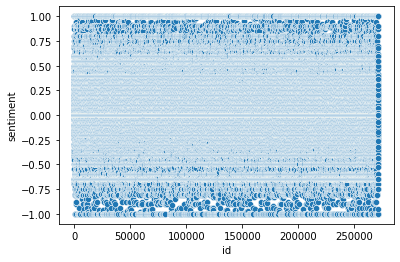

In [20]:
seaborn.scatterplot(data=df, x ="id", y="sentiment")

<AxesSubplot:xlabel='id', ylabel='subjective'>

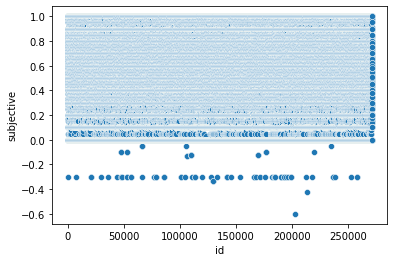

In [21]:
seaborn.scatterplot(data=df, x ="id", y="subjective")

In [22]:
df["lang"] = df.text.apply(lambda x: langid.classify(x)[0])

In [71]:
df = df[df["lang"]=="nl"]

In [73]:
# df.to_csv(os.path.join(data_path,"dutch_social", "dutch_all.csv"))

In [75]:
df.loc[(df["sentiment"]==0)& (df["subjective"]==0), "label"] =1 # neutral
df.loc[(df["sentiment"]> 0.5)& (df["subjective"]>=0.5), "label"] =2 # positive
df.loc[(df["sentiment"] < -0.5)& (df["subjective"]>=0.5), "label"] =0 # negative

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [76]:
df.label.value_counts()

1.0    61413
2.0    12925
0.0     9804
Name: label, dtype: int64

In [78]:
df.drop_duplicates(subset=["text"], inplace=True)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [79]:
df.label.value_counts()

1.0    30425
2.0     6860
0.0     4864
Name: label, dtype: int64

In [80]:
df.LEN = df.text.str.len()

/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_68880/2774872017.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.LEN = df.text.str.len()


In [81]:
min(df.LEN)

4

In [82]:
df_ = df[df.LEN>=10]

In [84]:
df_.label.value_counts()

1.0    30337
2.0     6855
0.0     4864
Name: label, dtype: int64

In [85]:
df_ =df_.groupby("label").sample(4864)

In [87]:
df_ = shuffle(df_)

In [89]:
df_.label.value_counts()

1.0    4864
2.0    4864
0.0    4864
Name: label, dtype: int64

In [88]:
train, val, test = split_data(df_)

In [93]:
test.label.value_counts()

2.0    503
0.0    482
1.0    475
Name: label, dtype: int64

In [91]:
train.to_csv(os.path.join(data_path, "train.csv"))
val.to_csv(os.path.join(data_path, "val.csv"))
test.to_csv(os.path.join(data_path, "test.csv"))
